# Importing the Required Libraries

In [3]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [6]:
df=pd.read_csv('Tweets.csv')

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Data Analysis 

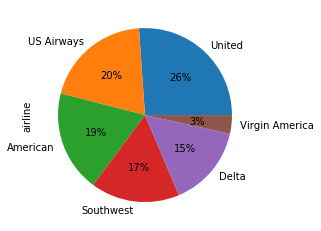

In [9]:
df.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')

- In the output, we can see the percentage of public tweets for each airline. United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).

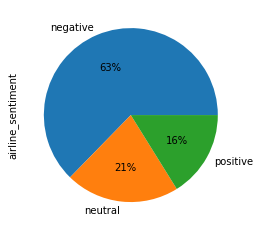

In [12]:
df.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

- From the output, we can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

#### Next, let's see the distribution of sentiment for each individual airline,


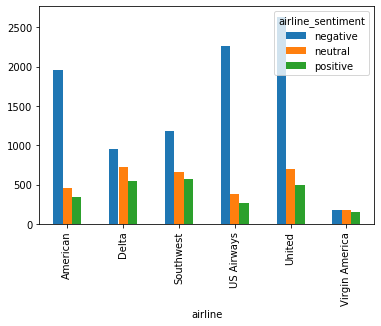

In [14]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

- It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

#### Finally, let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories. Execute the following script:

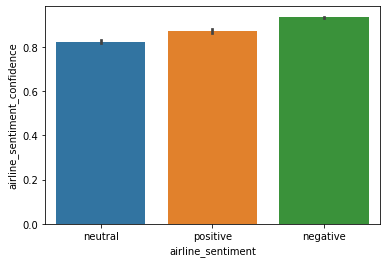

In [15]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=df)

# Data Cleaning

In [17]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values

In [18]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

# Representing Text in Numeric Form


# TF-IDF using the Scikit-Learn Library

In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

# Dividing Data into Training and Test Sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Training the Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

### Making Predictions and Evaluating the Model

In [22]:
predictions = text_classifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


# SVC

In [24]:
from sklearn.svm import SVC

In [25]:
svc=SVC()

In [26]:
svc.fit(X_train,y_train)

SVC()

In [27]:
### Making Predictions and Evaluating the Model

In [28]:
svc_predictions=svc.predict(X_test)

In [59]:
print(confusion_matrix(y_test,svc_predictions))
print(classification_report(y_test,svc_predictions))
print('Accuracy Score:',accuracy_score(y_test, svc_predictions))

[[1768   79   23]
 [ 313  264   37]
 [ 129   49  266]]
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1870
     neutral       0.67      0.43      0.52       614
    positive       0.82      0.60      0.69       444

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.78      0.78      0.77      2928

Accuracy Score: 0.7848360655737705


In [30]:
# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier()

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
knn_predictions=knn.predict(X_test)

In [60]:
print(confusion_matrix(y_test,knn_predictions))
print(classification_report(y_test,knn_predictions))
print('Accuracy Score:',accuracy_score(y_test, knn_predictions))

[[1500  316   54]
 [ 252  310   52]
 [ 118  103  223]]
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1870
     neutral       0.43      0.50      0.46       614
    positive       0.68      0.50      0.58       444

    accuracy                           0.69      2928
   macro avg       0.64      0.60      0.61      2928
weighted avg       0.70      0.69      0.70      2928

Accuracy Score: 0.6943306010928961


In [36]:
# Gradient Boosting classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
GRB=GradientBoostingClassifier()

In [39]:
GRB.fit(X_train,y_train)

GradientBoostingClassifier()

In [40]:
Grb_predictions=GRB.predict(X_test)

In [61]:
print(confusion_matrix(y_test,Grb_predictions))
print(classification_report(y_test,Grb_predictions))
print('Accuracy Score:',accuracy_score(y_test, Grb_predictions))

[[1772   59   39]
 [ 411  167   36]
 [ 179   43  222]]
              precision    recall  f1-score   support

    negative       0.75      0.95      0.84      1870
     neutral       0.62      0.27      0.38       614
    positive       0.75      0.50      0.60       444

    accuracy                           0.74      2928
   macro avg       0.71      0.57      0.60      2928
weighted avg       0.72      0.74      0.71      2928

Accuracy Score: 0.7380464480874317


# Naivye Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
GN=GaussianNB()

In [45]:
GN.fit(X_train,y_train)

GaussianNB()

In [46]:
Gn_predictions=GN.predict(X_test)

In [62]:
print(confusion_matrix(y_test,Gn_predictions))
print(classification_report(y_test,Gn_predictions))
print('Accuracy Score:',accuracy_score(y_test, Gn_predictions))

[[640 455 775]
 [ 63 211 340]
 [ 28  53 363]]
              precision    recall  f1-score   support

    negative       0.88      0.34      0.49      1870
     neutral       0.29      0.34      0.32       614
    positive       0.25      0.82      0.38       444

    accuracy                           0.41      2928
   macro avg       0.47      0.50      0.40      2928
weighted avg       0.66      0.41      0.44      2928

Accuracy Score: 0.4146174863387978


# XGB

In [49]:
from xgboost import XGBClassifier

In [50]:
XGB=XGBClassifier()

In [52]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
Xgb_predictions=XGB.predict(X_test)

In [63]:
print(confusion_matrix(y_test,Xgb_predictions))
print(classification_report(y_test,Xgb_predictions))
print('Accuracy Score:',accuracy_score(y_test, Xgb_predictions))

[[1724  105   41]
 [ 314  259   41]
 [ 124   56  264]]
              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      1870
     neutral       0.62      0.42      0.50       614
    positive       0.76      0.59      0.67       444

    accuracy                           0.77      2928
   macro avg       0.73      0.65      0.67      2928
weighted avg       0.75      0.77      0.75      2928

Accuracy Score: 0.7674180327868853


- From the above algrithms SVC classifier is performing better than the other models with an accuracy score of 78%